# Project 2: Ames Housing Data and Kaggle Challenge
---
**Book 1: Data Cleaning & Exploratory Data Analysis**<br>
Book 2: Preprocessing & Features Engineering<br>
Book 3: ML Modelling, Conclusion & Recommendation<br>
Author: Lee Wan Xian

## Problem Statement

Our client is a real estate agency that wants to predict property prices in the city of Ames, Iowa. With a good prediction on property prices, they would be able to channel their sales and marketing resources to the right customer base who have the means to afford it. The team is tasked to build a regression model that can predict the sale prices based on the property's features. The client would also like to know which key features have significant effect on sale prices.

## Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Summary of EDA](#Summary-of-EDA)

## Background

The housing market in Ames, Iowa has become very competitive over the years. On average, houses that are on sale are sold in 6 days time ([Source](https://www.redfin.com/city/477/IA/Ames/housing-market)).  Given such a competitive property market, the client needs to allocate their sales and marketing resources efficiently. That way, they would be able to achieve good sales without over-stretching their current resources. 

As a team of data scientists, the client has tasked us to create a machine learning (ML) model capable of predicting a property's sale price. The ML model is to make use of the property's features (i.e. property area, lot configuration, house type, neighborhood, etc.) for prediction. The ML model should be able to predict prices as close as to the actual sale price when a new set of property data is given. The Ames Iowa Housing dataset given to us by the client will serve as the dataset to train the model. The client has also introduced us to a [portal](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/overview) in Kaggle where we can use to test our model.

### Assumptions made

- Macroeconomic factors (i.e. Federal Reserve interest rates, inflation rate) do not have impact on the property's sale price.
- The property's sale price is independent with respect to time.

### Datasets used

There are 2 datasets included in the [`datasets`](../datasets/) folder for this project.

* [`train.csv`](../datasets/train.csv): Dataset that contains all features and data elements related to the properties (including its sale price)
* [`test.csv`](../datasets/test.csv): Dataset that contains all features and data elements related to the housing prices (excluding its sale price)

### Data Dictionary

The data dictionary of the train & test datasets is available in the below link.

[Data dictionary](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data)

## Python Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Import train dataset

In [2]:
# Import train dataset
dftrainraw = pd.read_csv('../datasets/train.csv')

### Cleanup train dataset for EDA

In [3]:
print(dftrainraw.shape)
dftrainraw.info()
dftrainraw.head()

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  Hou

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# Check for duplicated rows
dftrainraw.duplicated().value_counts()

False    2051
dtype: int64

In [5]:
# Show all variables that have 'missing' values
dftrainraw.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
dtype: int64

- There are no duplicate observations in this dataset.
- With reference to the data dictionary, most of the features with 'missing values' are not genuinely missing any values. The 'missing' data values in categorical variables (dtype=object) are referring to data responses as 'NA'. For instance, the missing values in `pool_qc` are actually supposed to capture as 'NA' as it is the only data observation that did not exist in the `pool_qc` series. To add on, some of the variables (like those starting with `garage`) have multicollinearity with `saleprice` & we can use this to infer the actual data value for all related variables.

In [6]:
# Create a separate copy for EDA purposes
dftrainEDAclean = dftrainraw

In [7]:
# Update column headers to lowercase & replace spaces with _
dftrainEDAclean.columns = dftrainEDAclean.columns.str.lower()
dftrainEDAclean.columns = dftrainEDAclean.columns.str.replace(' ', '_')

**Variable: pool_qc**

In [8]:
# show the highest value of pool_area when pool_qc is null
dftrainEDAclean[dftrainEDAclean['pool_qc'].isnull()]['pool_area'].max()

0

This means that all observations with 'missing' pool quality have a pool area equal to 0. Thus, it's fine to impute the missing values as `'NA'`

In [9]:
# fill up missing values with 'NA'
dftrainEDAclean['pool_qc'].fillna(value='NA', inplace=True)

**Variable: misc_feature**

In [10]:
# show the highest value of misc_val when misc_feature is null
dftrainEDAclean[dftrainEDAclean['misc_feature'].isnull()]['misc_val'].max()

0

This means that all observations with 'missing' miscellaneous features have zero value of miscellaneous features. Thus, it's fine to impute the missing values as `'NA'`

In [11]:
# fill up missing values with 'NA'
dftrainEDAclean['misc_feature'].fillna(value='NA', inplace=True)

**Variable: alley, fence**

In [12]:
print(f'Unique observations that exist in `alley` column are {dftrainEDAclean.alley.unique()}')
print(f'Unique observations that exist in `fence` column are {dftrainEDAclean.fence.unique()}')

Unique observations that exist in `alley` column are [nan 'Pave' 'Grvl']
Unique observations that exist in `fence` column are [nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


As the value `'NA'` does not exist in both series but exist based on the data dictionary, we can assume that the missing values in this series should be represented as `'NA'`

In [13]:
# fill up missing values with 'NA'
dftrainEDAclean['alley'].fillna(value='NA', inplace=True)
dftrainEDAclean['fence'].fillna(value='NA', inplace=True)

**Variable: fireplace_qu**

In [14]:
# show the highest value of fireplaces when fireplace_qu is null
dftrainEDAclean[dftrainEDAclean['fireplace_qu'].isnull()]['fireplaces'].max()

0

This means that all observations with 'missing' fireplace quality have zero fireplaces. Thus, it's fine to impute the missing values as `'NA'`

In [15]:
# fill up missing values with 'NA'
dftrainEDAclean['fireplace_qu'].fillna(value='NA', inplace=True)

**Variable: lot_frontage**

In [16]:
# show the list of unique observations in lot_frontage
print(f'Unique observations that exist in `lot_frontage` column are {dftrainEDAclean.lot_frontage.unique()}')

Unique observations that exist in `lot_frontage` column are [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]


In [17]:
# show how many observations are showing null value
dftrainEDAclean['lot_frontage'].isnull().value_counts()

False    1721
True      330
Name: lot_frontage, dtype: int64

We need to impute the missing values with the mean value of linear feet of street connected to property because:
1. `lot_frontage` is a numerical continuous variable representing the distance of street connected to property.
2. about 16% of observations are affected by this & dropping them might produce a suboptimal model performance.

In [18]:
# Impute the missing values with the mean of lot_frontage
dftrainEDAclean['lot_frontage'].fillna(dftrainraw['lot_frontage'].mean(), inplace=True)

**Variable: garage related columns**

In [19]:
# show the list of unique values in garage_type, garage_cond, garage_qual, garage_finish
print(f'Unique observations that exist in `garage_type` column are {dftrainEDAclean.garage_type.unique()}')
print(f'Unique observations that exist in `garage_cond` column are {dftrainEDAclean.garage_cond.unique()}')
print(f'Unique observations that exist in `garage_qual` column are {dftrainEDAclean.garage_qual.unique()}')
print(f'Unique observations that exist in `garage_finish` column are {dftrainEDAclean.garage_finish.unique()}')

Unique observations that exist in `garage_type` column are ['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
Unique observations that exist in `garage_cond` column are ['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
Unique observations that exist in `garage_qual` column are ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Unique observations that exist in `garage_finish` column are ['RFn' 'Unf' 'Fin' nan]


As the value `'NA'` does not exist in all 4 series but exist based on the data dictionary, we can assume that the missing values in this series should be represented as `'NA'`.

In [20]:
# fill up missing values with 'NA'
dftrainEDAclean['garage_type'].fillna(value='NA', inplace=True)
dftrainEDAclean['garage_cond'].fillna(value='NA', inplace=True)
dftrainEDAclean['garage_qual'].fillna(value='NA', inplace=True)
dftrainEDAclean['garage_finish'].fillna(value='NA', inplace=True)

In [21]:
# Show the observation that has the garage_type observation but null observations for everything else
dftrainEDAclean.loc[(dftrainraw.garage_cars.isnull()), ['garage_type','garage_cond','garage_qual','garage_finish','garage_yr_blt','garage_cars','garage_area']]

,garage_type,garage_cond,garage_qual,garage_finish,garage_yr_blt,garage_cars,garage_area
1712,Detchd,NA,NA,NA,NaN,NaN,NaN


Do note that there is 1 observation that has a `garage_type` but zero `garage_cars` and zero `garage_area`. As there is only 1 such incomplete observation out of 2051 observations (which is less than 5% of the total observations), it is fine to drop this observation from modelling.

In [22]:
# Remove the 1 missing observation row
dftrainEDAclean.dropna(subset=['garage_cars'], inplace=True)

In [23]:
# show the list of unique observations in garage_type when garage year built is null
dftrainEDAclean[dftrainEDAclean['garage_yr_blt'].isnull()]['garage_type'].unique()

array(['NA'], dtype=object)

As the 113 observations with missing year garage was built have no garage to begin with, it is fine to leave the missing values as it is.

**Variable: basement related columns**

In [24]:
# Comparing unique values in Basement finished area (categorical features)
print(f'Unique observations that exist in `bsmt_cond` column are {dftrainEDAclean.bsmt_cond.unique()}')
print(f'Unique observations that exist in `bsmt_qual` column are {dftrainEDAclean.bsmt_qual.unique()}')
print(f'Unique observations that exist in `bsmtfin_type_1` column are {dftrainEDAclean.bsmtfin_type_1.unique()}')
print(f'Unique observations that exist in `bsmtfin_type_2` column are {dftrainEDAclean.bsmtfin_type_2.unique()}')
print(f'Unique observations that exist in `bsmt_exposure` column are {dftrainEDAclean.bsmt_exposure.unique()}')

Unique observations that exist in `bsmt_cond` column are ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
Unique observations that exist in `bsmt_qual` column are ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
Unique observations that exist in `bsmtfin_type_1` column are ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
Unique observations that exist in `bsmtfin_type_2` column are ['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
Unique observations that exist in `bsmt_exposure` column are ['No' 'Gd' 'Av' nan 'Mn']


As the value `'NA'` does not exist in the above 5 features but exist based on the data dictionary, we can assume that the missing values in this series should be represented as `'NA'`

In [25]:
# fill up missing values with 'NA'
dftrainEDAclean['bsmt_cond'].fillna(value='NA', inplace=True)
dftrainEDAclean['bsmt_qual'].fillna(value='NA', inplace=True)
dftrainEDAclean['bsmtfin_type_1'].fillna(value='NA', inplace=True)
dftrainEDAclean['bsmtfin_type_2'].fillna(value='NA', inplace=True)
dftrainEDAclean['bsmt_exposure'].fillna(value='NA', inplace=True)

In [26]:
# Show the observations where bsmt_full_bath was null
dftrainEDAclean.loc[(dftrainEDAclean['bsmt_full_bath'].isnull()),['bsmt_cond','bsmt_full_bath','bsmt_half_bath','total_bsmt_sf','bsmt_unf_sf','bsmtfin_sf_1','bsmtfin_sf_2']]

,bsmt_cond,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2
616,NA,NaN,NaN,0.0,0.0,0.0,0.0
1327,NA,NaN,NaN,NaN,NaN,NaN,NaN


Given that the above 2 observations have been classified as not having any basement, we can impute the remaining missing values under numerical variables as `0`.

In [27]:
# Impute the missing values in numerical features with 0.0
dftrainEDAclean['bsmt_full_bath'].fillna(0, inplace=True)
dftrainEDAclean['bsmt_half_bath'].fillna(0, inplace=True)
dftrainEDAclean['total_bsmt_sf'].fillna(0, inplace=True)
dftrainEDAclean['bsmt_unf_sf'].fillna(0, inplace=True)
dftrainEDAclean['bsmtfin_sf_1'].fillna(0, inplace=True)
dftrainEDAclean['bsmtfin_sf_2'].fillna(0, inplace=True)

**Variable: Masonry veneer related columns**

In [28]:
# show the highest value of mas_vnr_area when mas_vnr_type is null
dftrainEDAclean[dftrainEDAclean['mas_vnr_type'].isnull()]['mas_vnr_area'].max()

nan

This means that all observations with 'missing' masonry veneer type have no masonry veneer area in square feet. Thus, it's fine to impute the missing values as `'NA'` & `0` respectively.

In [29]:
# fill up missing values with 'NA' for mas_vnr_type & 0 for mas_vnr_area
dftrainEDAclean['mas_vnr_type'].fillna(value='NA', inplace=True)
dftrainEDAclean['mas_vnr_area'].fillna(0, inplace=True)

In [30]:
# Show all variables that have 'missing' values
dftrainEDAclean.isnull().sum().sort_values(ascending=False).head(2)

garage_yr_blt    113
heating_qc         0
dtype: int64

**After cleaning up the train dataframe, only `garage_yr_blt` column has null values, given that those observations do not have a garage to begin with.**

## Exploratory Data Analysis

In [31]:
# No. of categorical columns & the list of such columns
print(len(dftrainEDAclean.select_dtypes(include='object').columns))
dftrainEDAclean.select_dtypes(include='object').columns

42


Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [32]:
# No. of numerical columns & the list of such columns
print(len(dftrainEDAclean.select_dtypes(exclude='object').columns))
dftrainEDAclean.select_dtypes(exclude='object').columns

39


Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

In [33]:
# Summary data for all variables
dfstats = dftrainEDAclean.describe(include='all').T
dfstats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2050.0,NaN,NaN,NaN,1473.661463,844.018399,1.0,753.25,1483.5,2196.5,2930.0
pid,2050.0,NaN,NaN,NaN,713494098.201951,188687867.375728,526301100.0,528458135.0,535453180.0,907179032.5,924152030.0
ms_subclass,2050.0,NaN,NaN,NaN,57.002439,42.83371,20.0,20.0,50.0,70.0,190.0
ms_zoning,2050,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_frontage,2050.0,NaN,NaN,NaN,69.064496,21.307396,21.0,60.0,69.0552,78.0,313.0
...,...,...,...,...,...,...,...,...,...,...,...
misc_val,2050.0,NaN,NaN,NaN,51.599512,573.532756,0.0,0.0,0.0,0.0,17000.0
mo_sold,2050.0,NaN,NaN,NaN,6.221463,2.744483,1.0,4.0,6.0,8.0,12.0
yr_sold,2050.0,NaN,NaN,NaN,2007.776098,1.312222,2006.0,2007.0,2008.0,2009.0,2010.0
sale_type,2050,9,WD,1780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical Variables

In [34]:
# Find all categorical variables with more than 85% of observations (about 1743 datapoints) having the same common value
concent_cate_variable = dfstats[dfstats['freq'] > 1743]

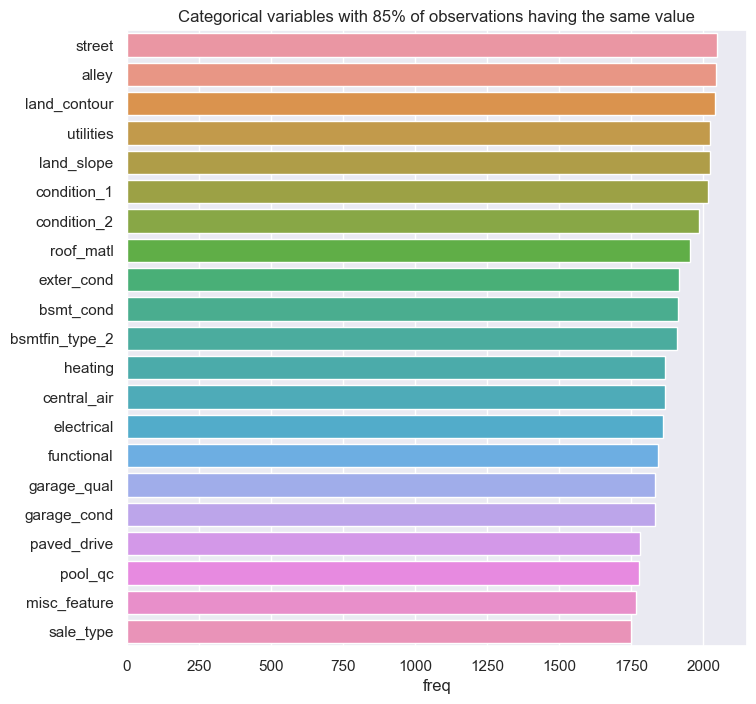

In [35]:
# Chart out the list of categorical variables that have high concentration of 1 common observation value
plt.figure(figsize=(8,8))
sns.set(font_scale=1.0)

sns.barplot(data=concent_cate_variable.sort_values('freq', ascending=False), 
            x='freq', 
            y=concent_cate_variable.index);

plt.title("Categorical variables with 85% of observations having the same value");

Due to the high concentration of observations having the same value, we will consider to drop these variables for modelling. Reason being that these variables do not have a good variance amongst its observations and would create more noise to the model instead.

For the remaining categorical variables, we will use boxplots to observe the variance of data observations in relation to saleprice.

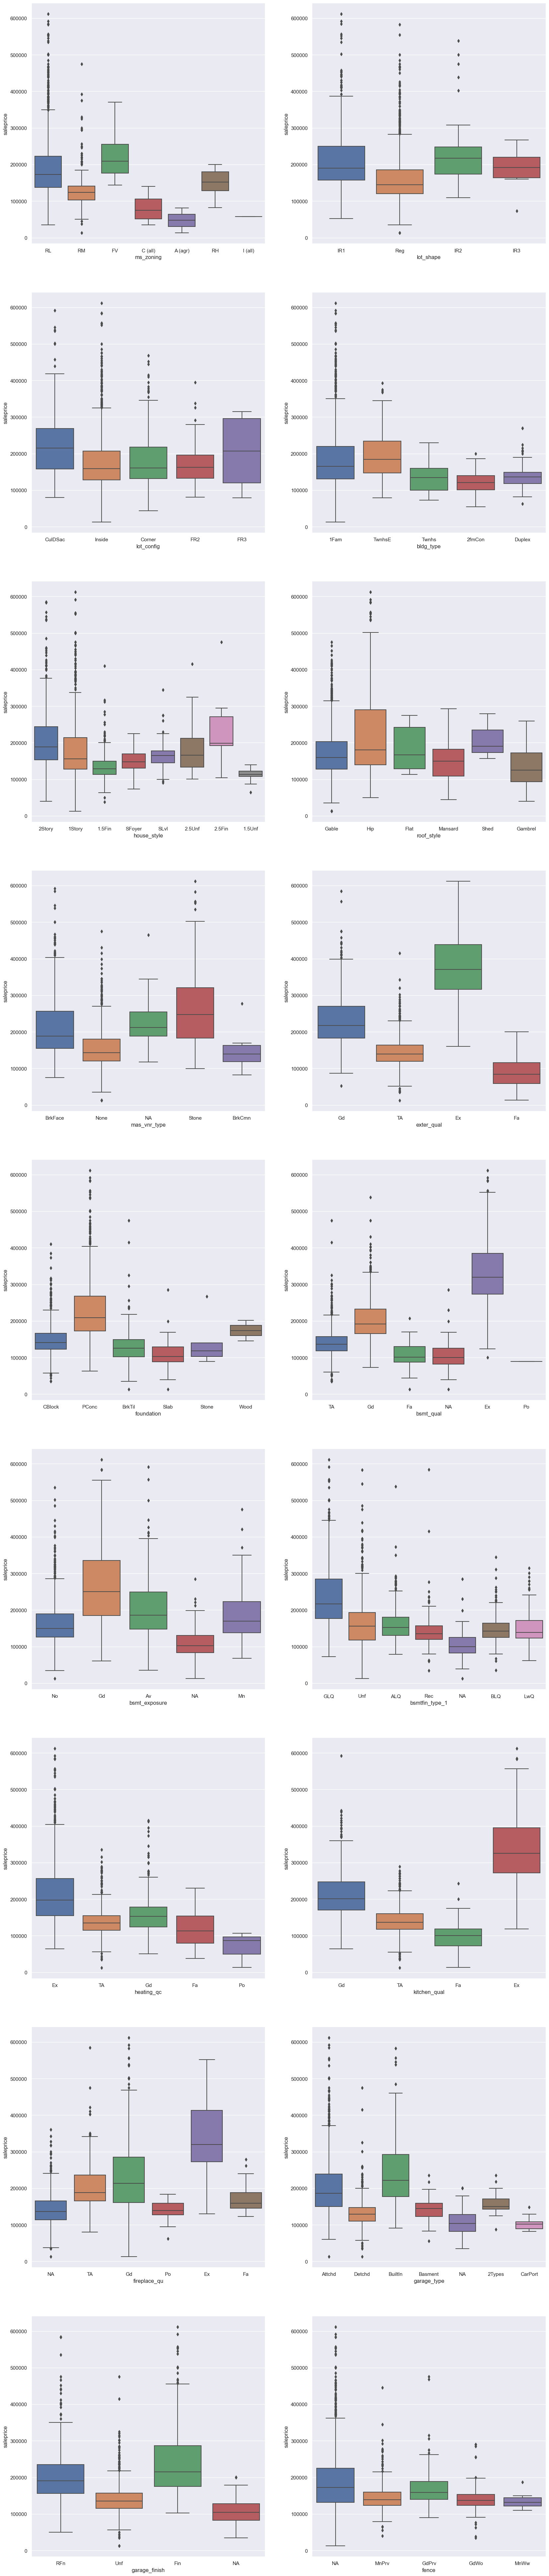

In [36]:
fig, axes = plt.subplots(9,2, figsize=(20,100)) # configure the plot area for all subplots
sns.set(font_scale=1.1)

# code for all individual variables against saleprice subplots
sns.boxplot(data=dftrainEDAclean, ax=axes[0,0], x='ms_zoning', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[0,1], x='lot_shape', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[1,0], x='lot_config', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[1,1], x='bldg_type', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[2,0], x='house_style', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[2,1], x='roof_style', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[3,0], x='mas_vnr_type', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[3,1], x='exter_qual', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[4,0], x='foundation', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[4,1], x='bsmt_qual', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[5,0], x='bsmt_exposure', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[5,1], x='bsmtfin_type_1', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[6,0], x='heating_qc', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[6,1], x='kitchen_qual', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[7,0], x='fireplace_qu', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[7,1], x='garage_type', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[8,0], x='garage_finish', y='saleprice');
sns.boxplot(data=dftrainEDAclean, ax=axes[8,1], x='fence', y='saleprice');

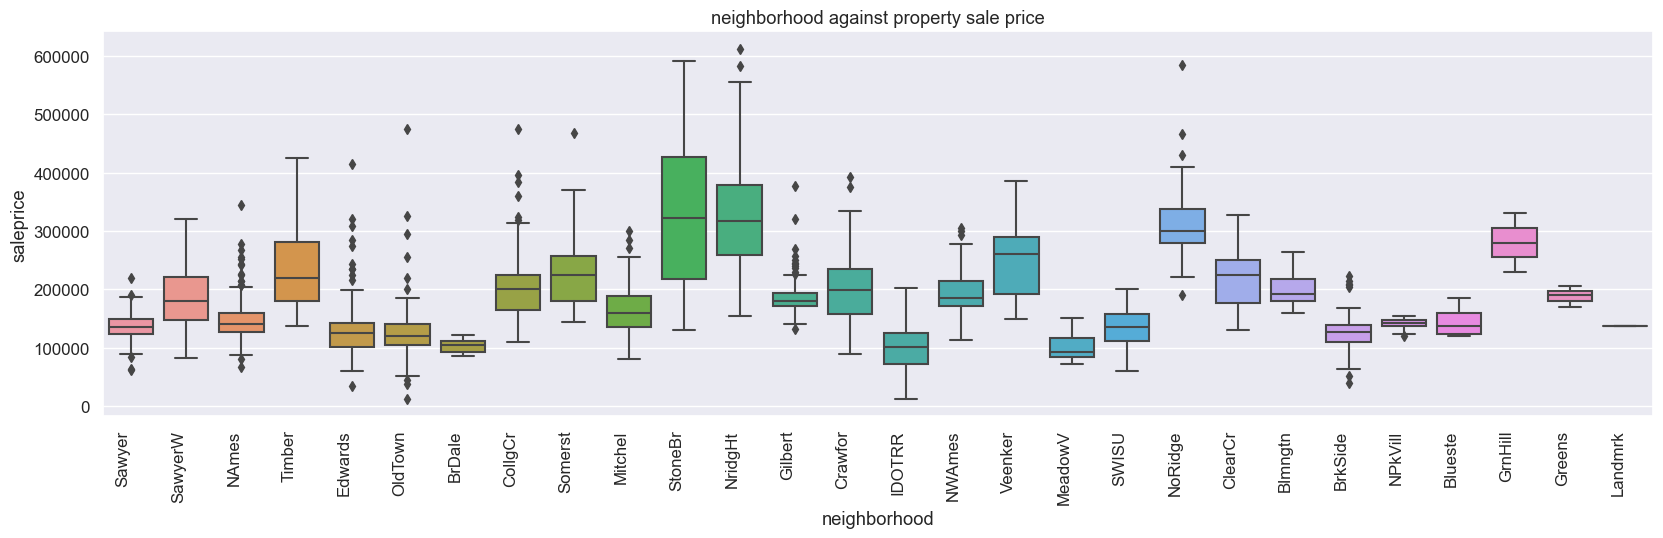

In [37]:
# Boxplot for neighborhood against saleprice

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, horizontalalignment='right') # tilt x-axis labels

sns.boxplot(data=dftrainEDAclean, x='neighborhood', y='saleprice'); 

plt.title("neighborhood against property sale price");

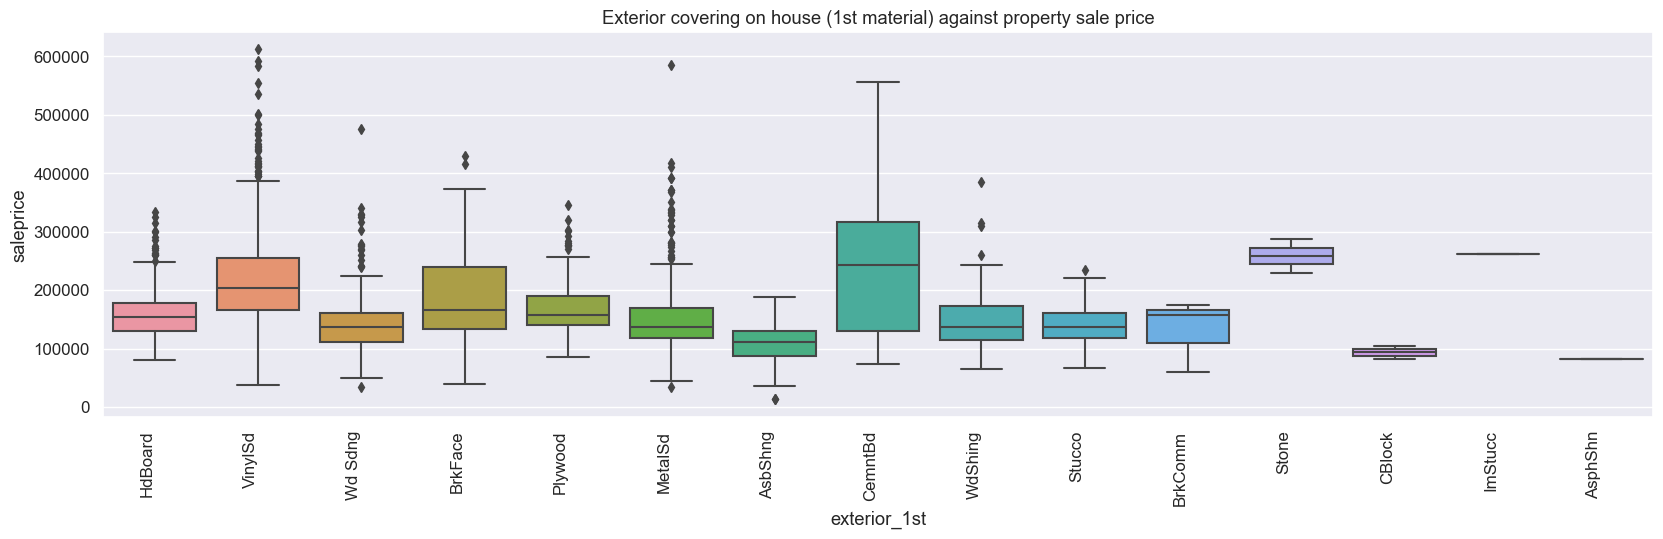

In [38]:
# Boxplot for Exterior covering on house (1st material) against saleprice

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, horizontalalignment='right') # tilt x-axis labels

sns.boxplot(data=dftrainEDAclean, x='exterior_1st', y='saleprice');

plt.title("Exterior covering on house (1st material) against property sale price");

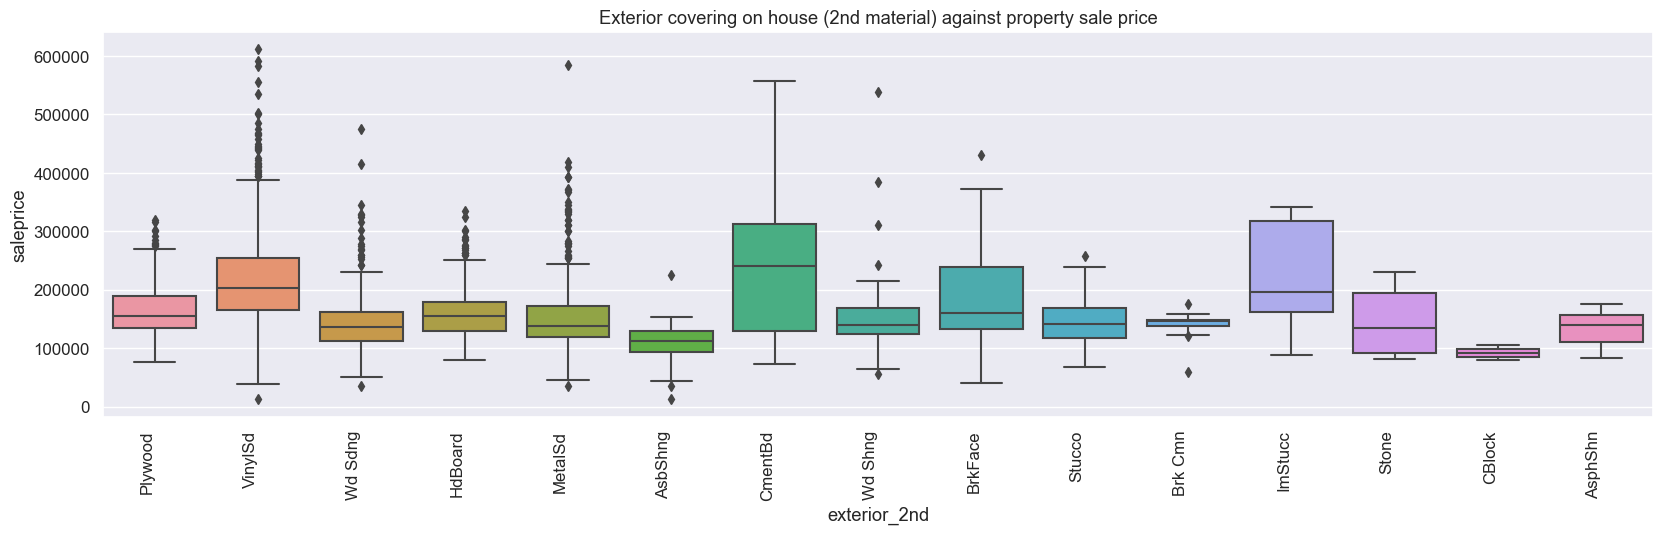

In [39]:
# Boxplot for Exterior covering on house (2nd material) against saleprice

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, horizontalalignment='right') # tilt x-axis labels

sns.boxplot(data=dftrainEDAclean, x='exterior_2nd', y='saleprice'); 

plt.title("Exterior covering on house (2nd material) against property sale price");

**Findings**

Out of 42 categorical variables, 21 of them have a high concentration of 1 common observation value. <br>
Out of the remaining 21 variables, a handful of them do not have equal variance amongst their observations with respect to the property's sale price. For instance, the type of roof & fence quality.<br>
Thus, the variables that seem to have a good spread of variances, with respect to the sale price, are generally related to the property's location, basement, garage, kitchen, fireplace, heating & exterior quality of the house. In essence, these few features seem to have some influence on the property's sale price.

### Numerical Variables

In [40]:
# Create a dataframe for numerical variables together with SalePrice

df_train_numerical = dftrainEDAclean.select_dtypes(exclude='object')
df_train_numerical.drop(columns=['id','pid','ms_subclass','overall_qual','overall_cond'], inplace=True) # I excluded these 4 features for now

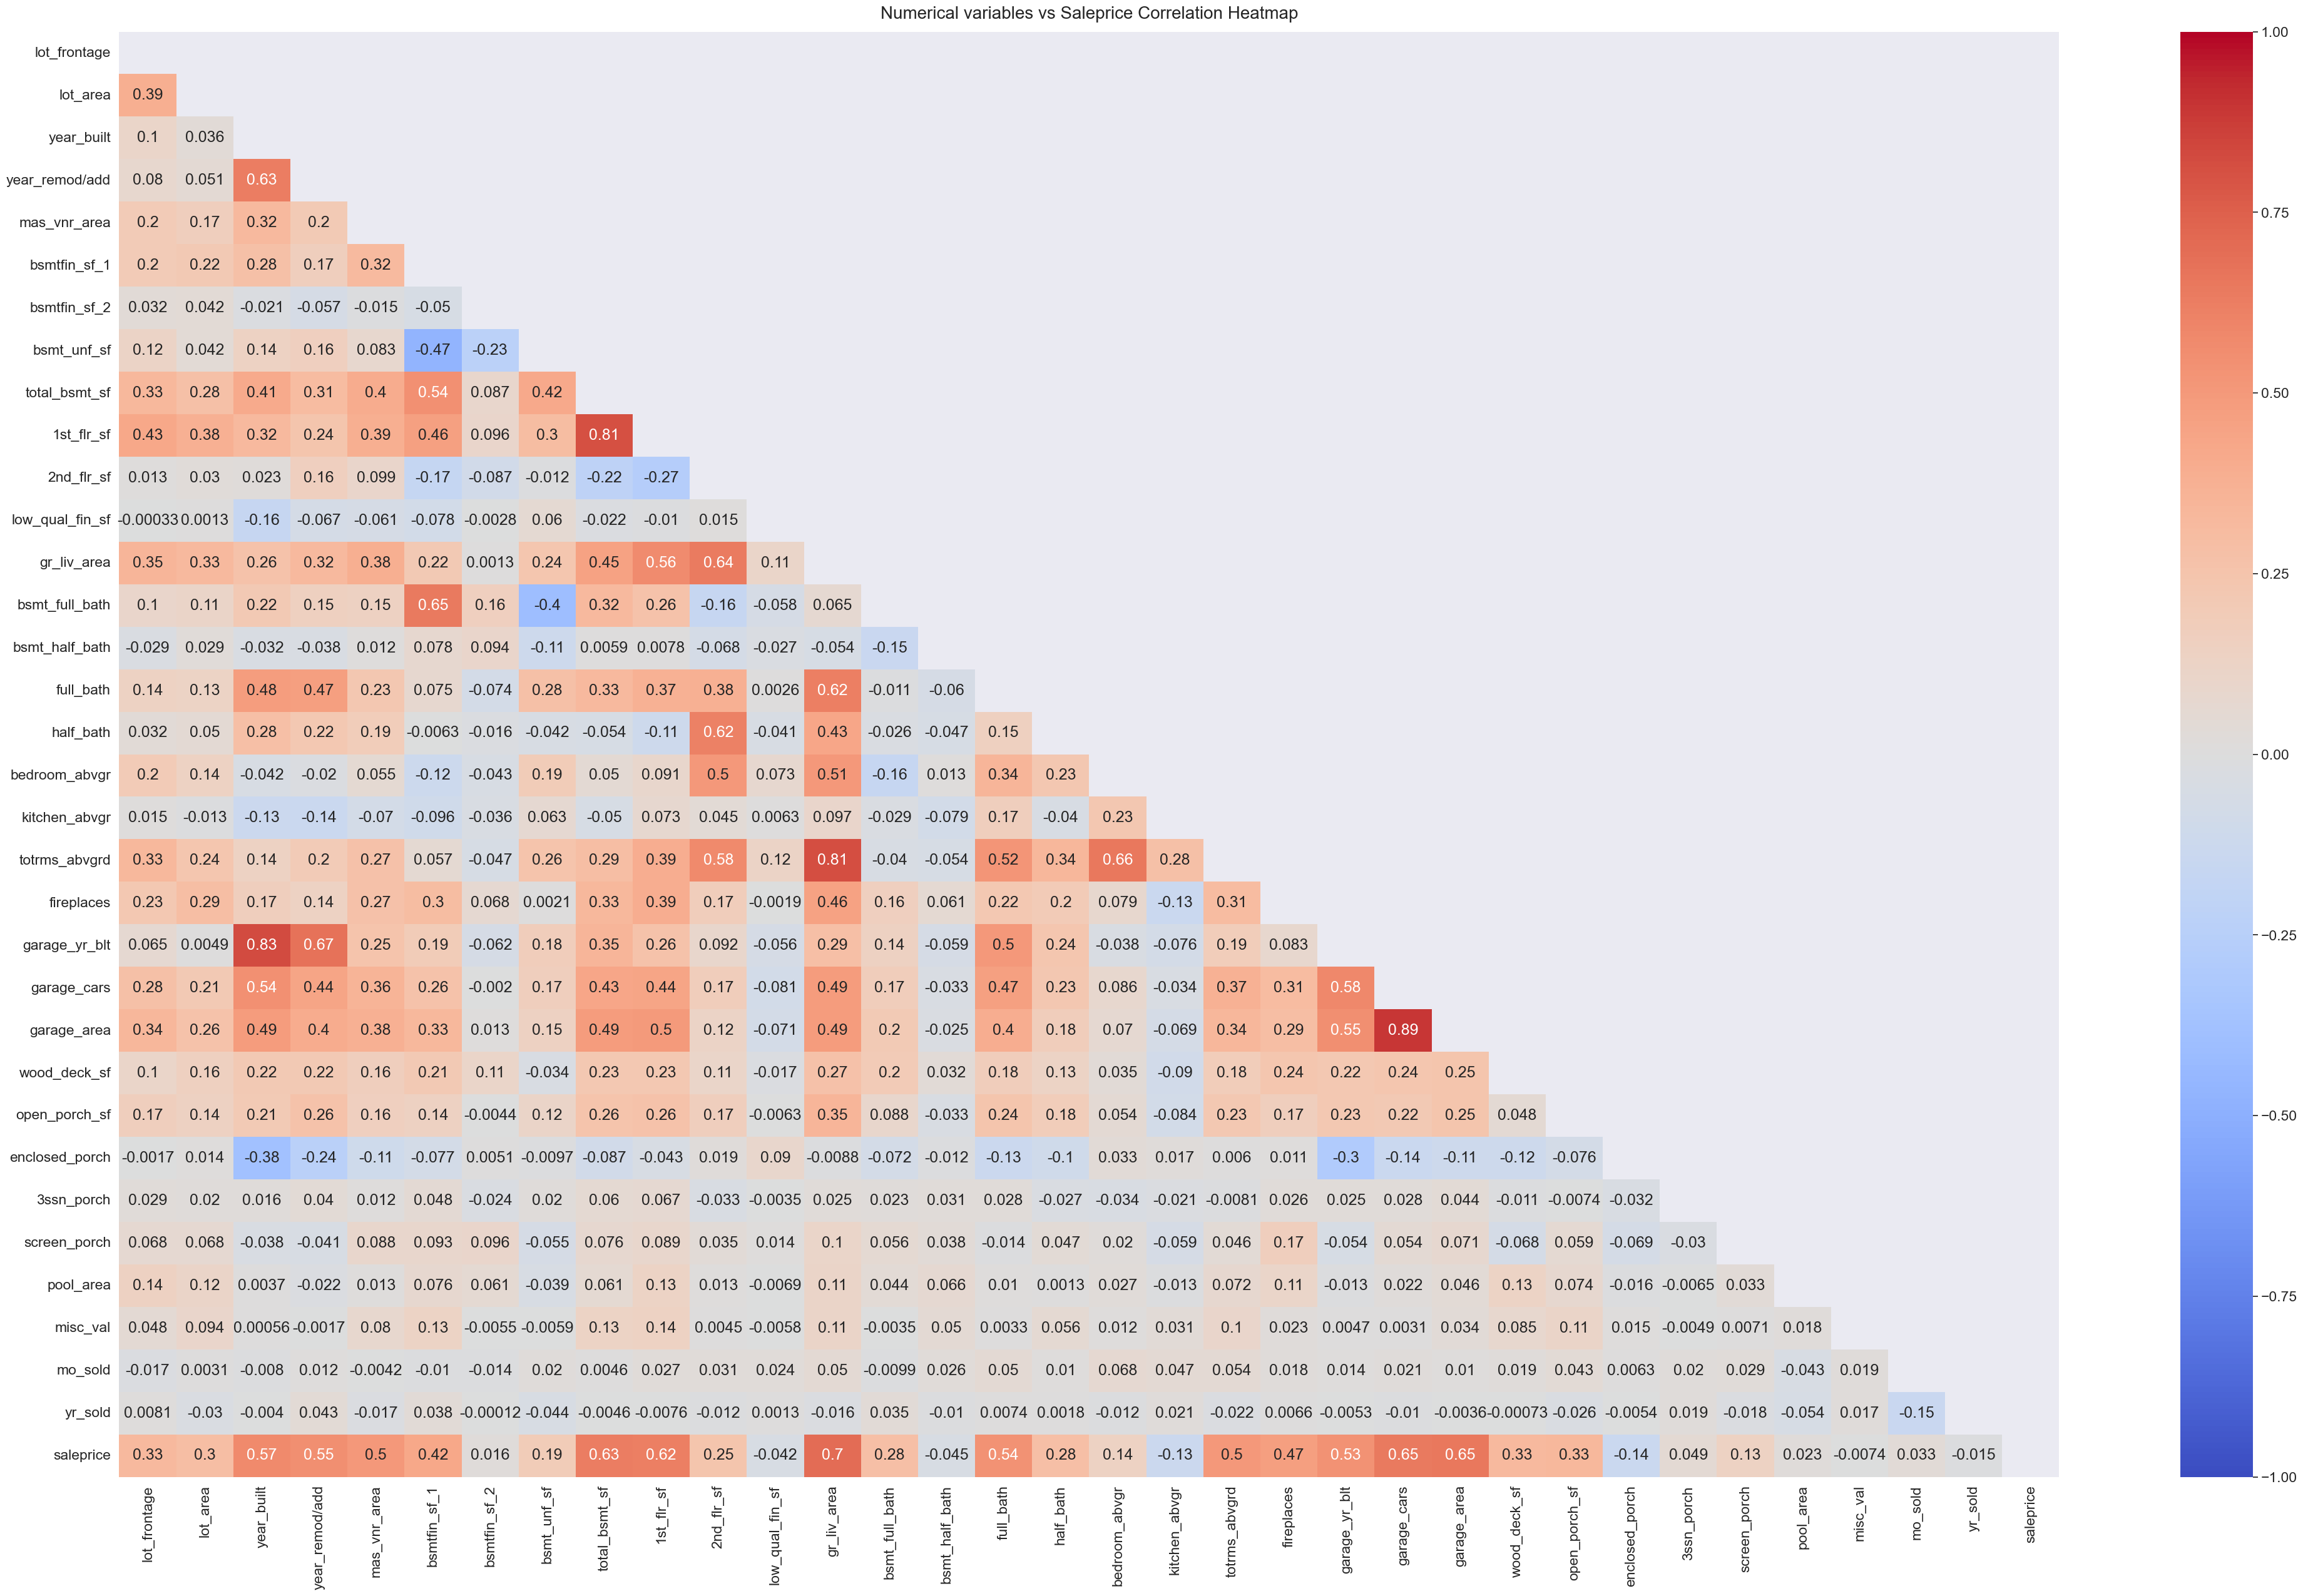

In [41]:
# Correlation heatmap for Numerical variables vs Saleprice dataframe

plt.figure(figsize=(50,30))
sns.set(font_scale=1.5)

mask = np.triu(np.ones_like(df_train_numerical.corr())) # to mask the topright triangle for better visualisation

heatmap = sns.heatmap(df_train_numerical.corr(),
                      mask=mask,
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='coolwarm');
heatmap.set_title('Numerical variables vs Saleprice Correlation Heatmap',
                  fontdict={'fontsize':20},
                  pad=15);

In [42]:
# show variables that have a strong correlation with saleprice
dftemp = df_train_numerical.corr()[['saleprice']]
dftemp[dftemp['saleprice'] > 0.5].T

,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,saleprice
saleprice,0.57193,0.550589,0.50353,0.629273,0.618451,0.697261,0.538211,0.50399,0.533922,0.64822,0.65027,1.0


The above variables have a strong correlation with the property's sale price (pearson correlation > $|0.5|$). Amongst these variables, some of them have some multicollinearity with each other, as described from the correlation heatmap.

Group of Variables with multicollinearity|
---|
`year_built`; `year_remod/add`; `garage_yr_blt`|
`garage_cars`; `garage_area`|
`total_bmst_sf`; `1st_flr_sf`|
`1st_flr_sf`; `gr_liv_area`; `totrms_abvgrd`|

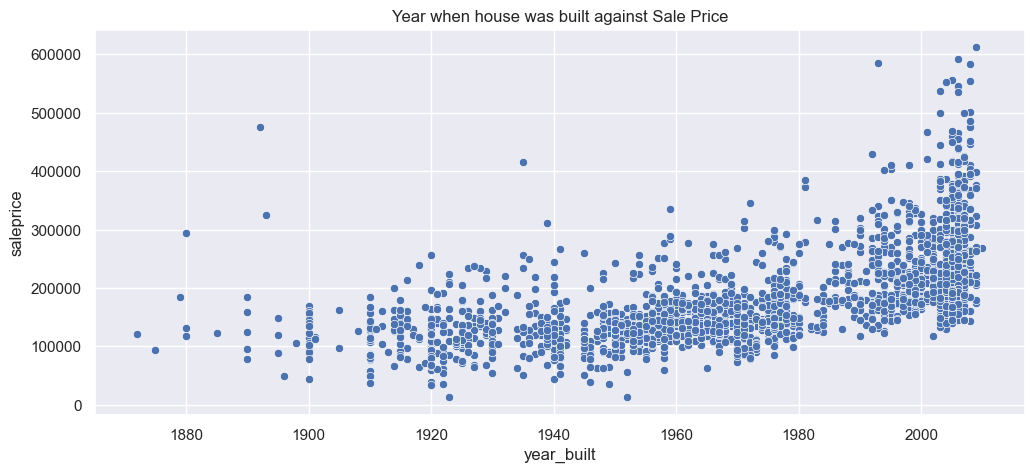

In [43]:
# Scatter plot for `year_built`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="year_built", y="saleprice");
plt.title(f'Year when house was built against Sale Price', fontsize = 12);

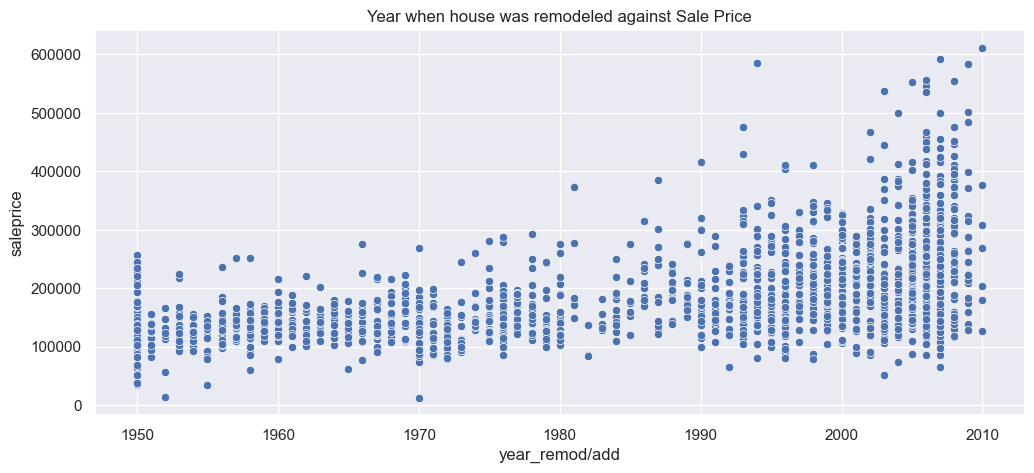

In [44]:
# Scatter plot for `year_remod/add`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="year_remod/add", y="saleprice");
plt.title(f'Year when house was remodeled against Sale Price', fontsize = 12);

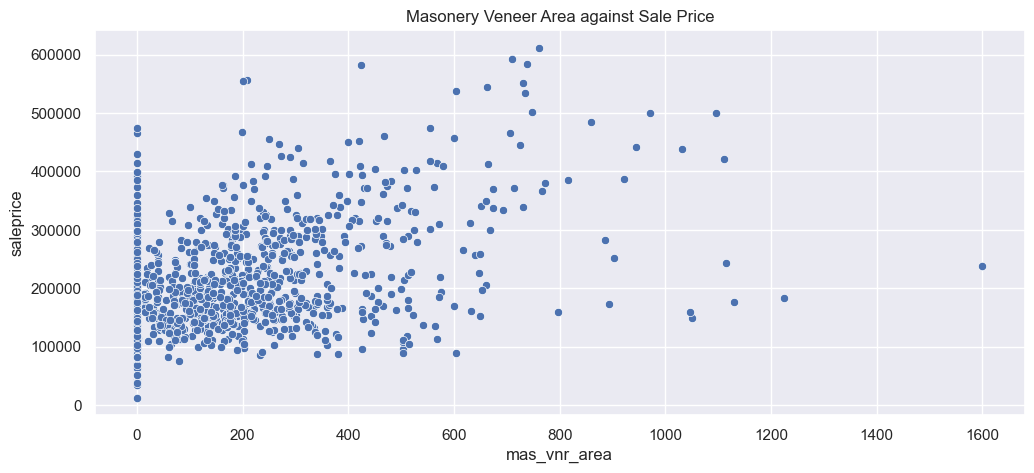

In [45]:
# Scatter plot for `mas_vnr_area`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="mas_vnr_area", y="saleprice");
plt.title(f'Masonery Veneer Area against Sale Price', fontsize = 12);

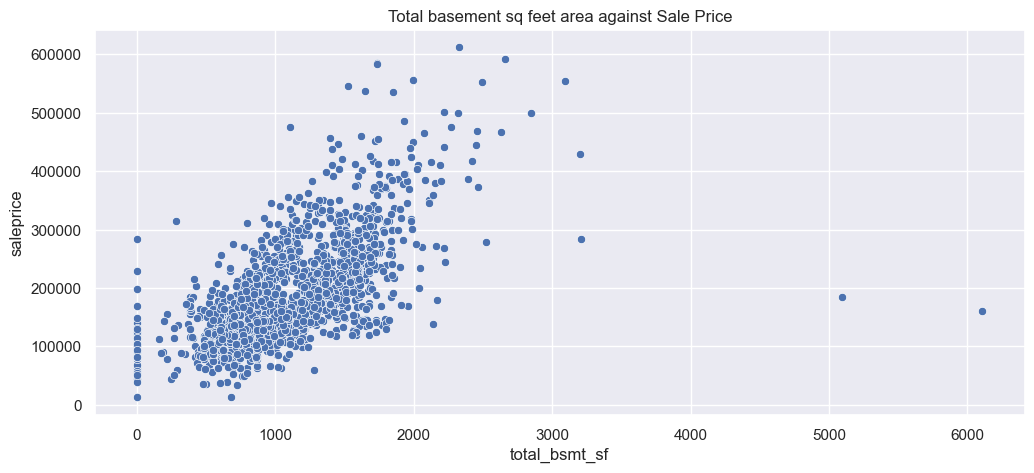

In [46]:
# Scatter plot for `total_bsmt_sf`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="total_bsmt_sf", y="saleprice");
plt.title(f'Total basement sq feet area against Sale Price', fontsize = 12);

There are 2 outliers where the total basement area is above 5000 sq feet but yet their sale price is much lower than expected (below 200k). There might be other features that could have influenced the sale price to be lower.

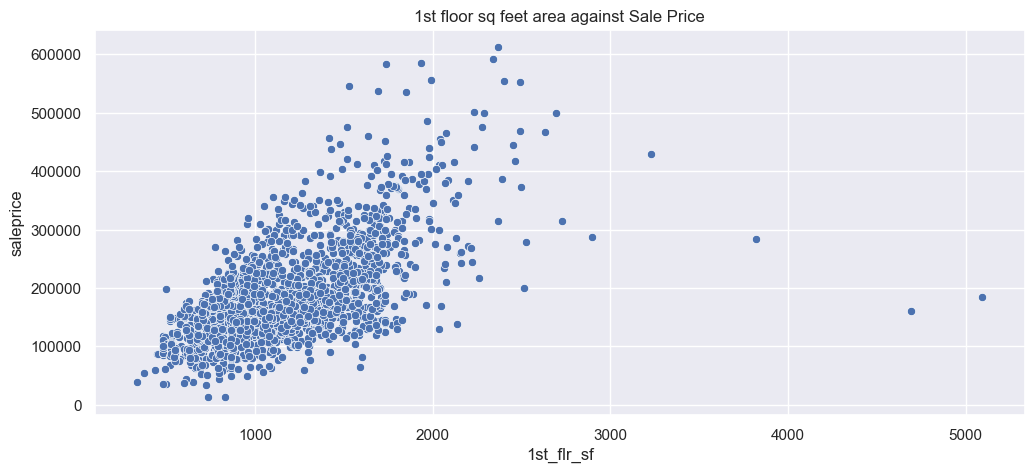

In [47]:
# Scatter plot for `1st_flr_sf`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="1st_flr_sf", y="saleprice");
plt.title(f'1st floor sq feet area against Sale Price', fontsize = 12);

There are 2 outliers where the total basement area is above 4500 sq feet but yet their sale price is much lower than expected (below 200k). There are some multicollinearity between `1st_flr_sf` and `total_bmst_sf`. This means the outliers in both charts might be referring to the same properties.

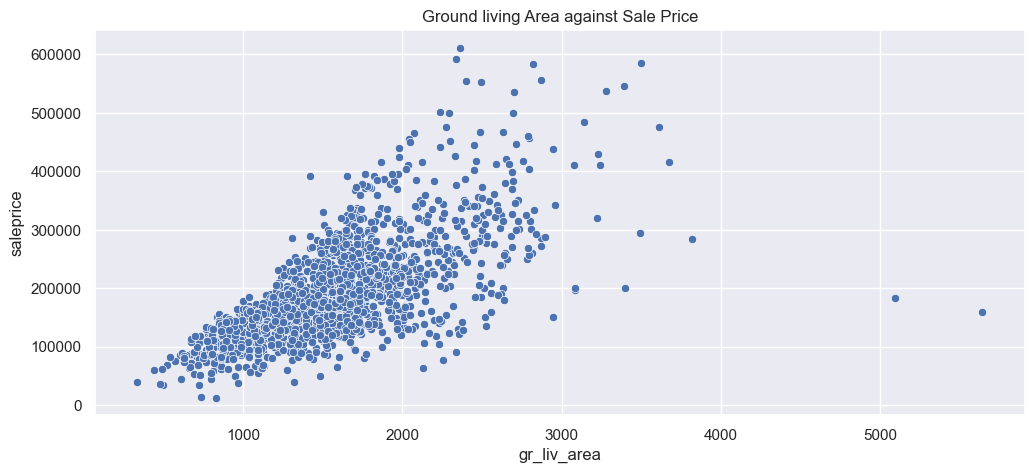

In [48]:
# Scatter plot for `gr_liv_area`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="gr_liv_area", y="saleprice");
plt.title(f'Ground living Area against Sale Price', fontsize = 12);

There are 2 outliers where the above grade living area is above 5000 sq feet but yet their sale price is much lower than expected (below 200k). There are some multicollinearity between `gr_liv_area` and `1st_flr_sf`. This means that the outliers in both charts might be refering to the same properties.

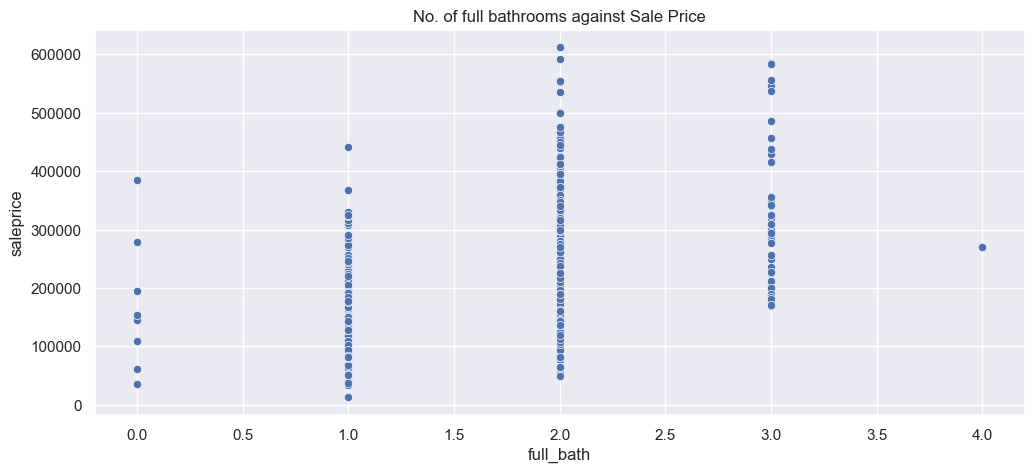

In [49]:
# Scatter plot for `full_bath`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="full_bath", y="saleprice");
plt.title(f'No. of full bathrooms against Sale Price', fontsize = 12);

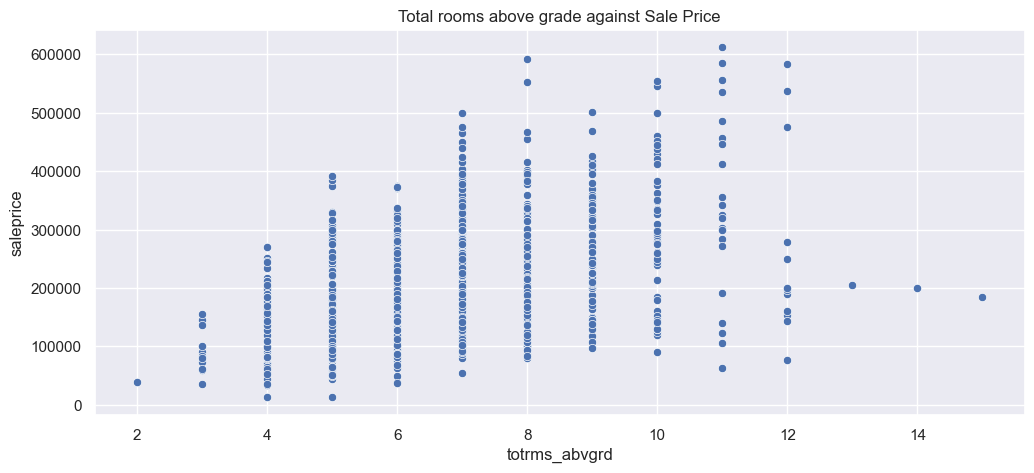

In [50]:
# Scatter plot for `totrms_abvgrd`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="totrms_abvgrd", y="saleprice");
plt.title(f'Total rooms above grade against Sale Price', fontsize = 12);

There are 3 outliers where the total rooms above grade is above 12 but yet their sale price is much lower than expected (below 200k). There might be other features that could have influenced the sale price to be lower.

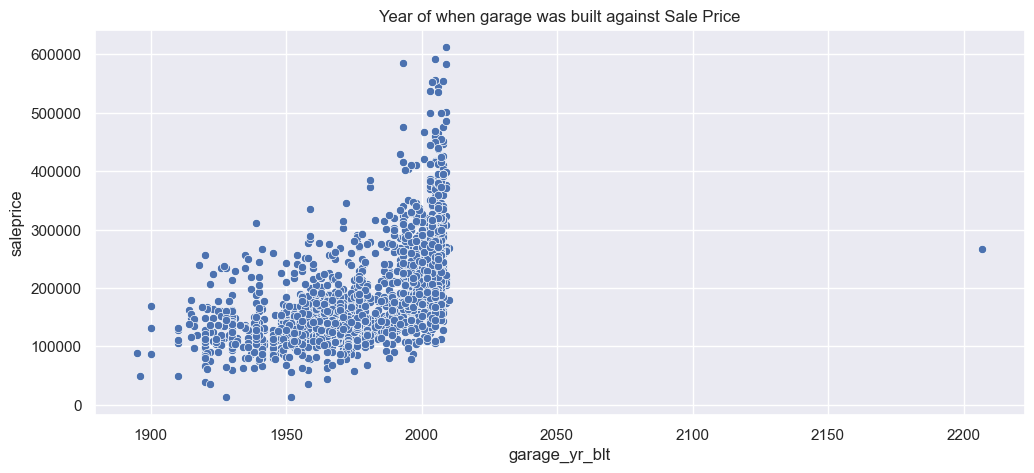

In [51]:
# Scatter plot for `garage_yr_blt`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)

sns.scatterplot(data=dftrainEDAclean, x="garage_yr_blt", y="saleprice");
plt.title(f'Year of when garage was built against Sale Price', fontsize = 12);

There is an outlier where the year of garage built is beyond year 2200. This is most likely an error in the dataset itself. To add on, the distribution of this variable is not normally distributed. We will drop this outlier from the modelling if this feature is to be used.

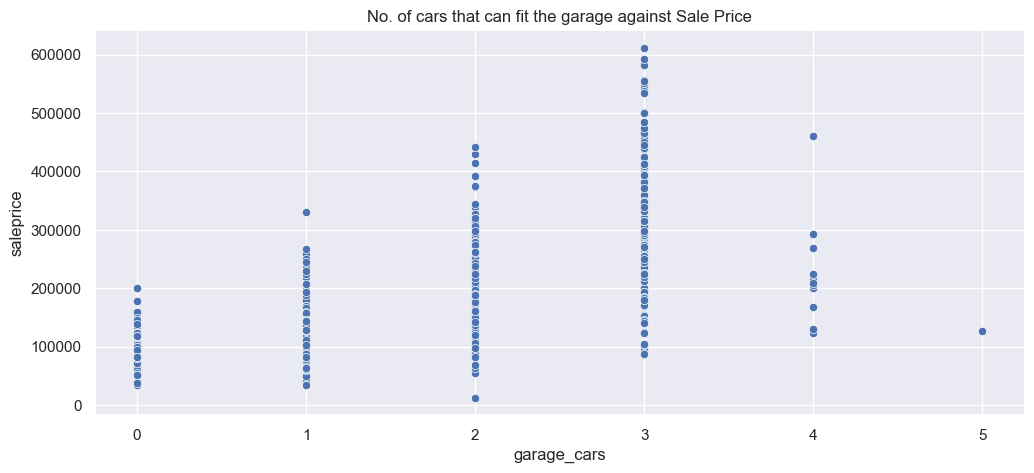

In [52]:
# Scatter plot for `garage_cars`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="garage_cars", y="saleprice");
plt.title(f'No. of cars that can fit the garage against Sale Price', fontsize = 12);

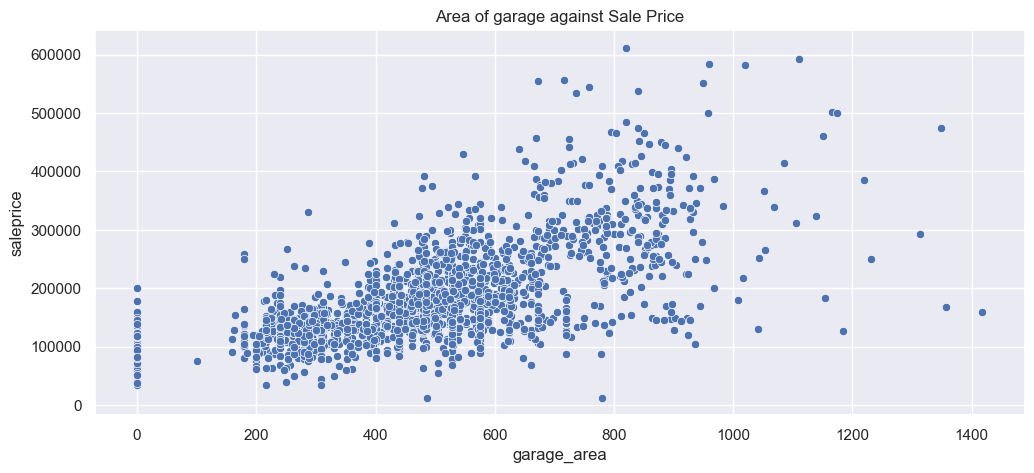

In [53]:
# Scatter plot for `garage_area`
plt.figure(figsize=(12,5))
sns.set(font_scale=1.0)
sns.scatterplot(data=dftrainEDAclean, x="garage_area", y="saleprice");
plt.title(f'Area of garage against Sale Price', fontsize = 12);

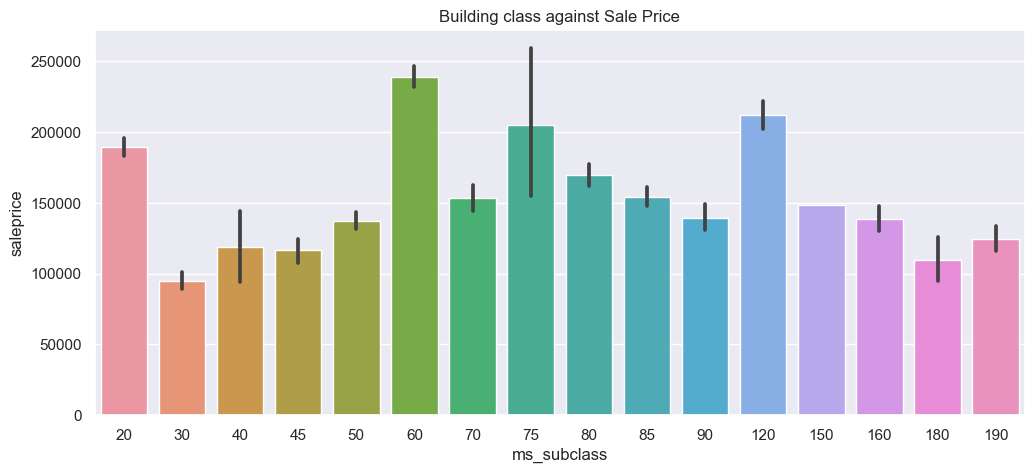

In [54]:
# barplot for ms_subclass against Sale Price
plt.figure(figsize=(12,5))
sns.barplot(data=dftrainEDAclean,
            x="ms_subclass",
            y="saleprice");
plt.title(f'Building class against Sale Price', fontsize = 12);

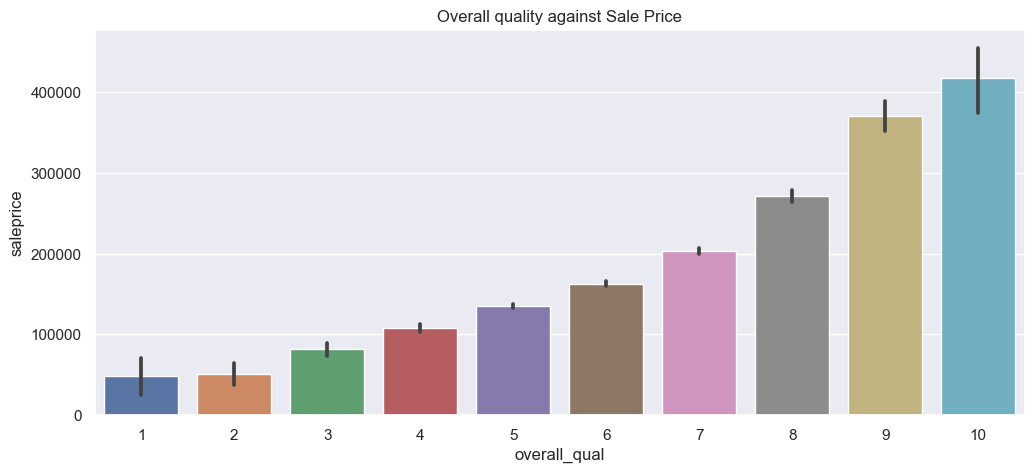

In [55]:
# barplot for overall quality against Sale Price
plt.figure(figsize=(12,5))
sns.barplot(data=dftrainEDAclean,
            x="overall_qual",
            y="saleprice");
plt.title(f'Overall quality against Sale Price', fontsize = 12);

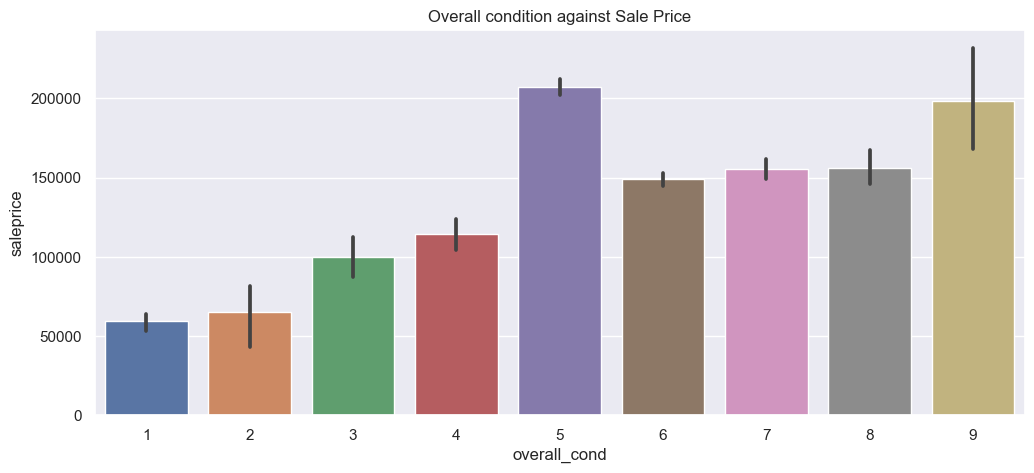

In [56]:
# barplot for overall condition against Sale Price
plt.figure(figsize=(12,5))
sns.barplot(data=dftrainEDAclean,
            x="overall_cond",
            y="saleprice");
plt.title(f'Overall condition against Sale Price', fontsize = 12);

**Findings**

Out of 39 numerical variables, there are 12 variables that have a strong correlation with the sale price. So far, the size of the garage, the year when the property was remodelled & the size of the property size seems to be a good predictor of house sale price. The building class, overall material & finish quality & overall condition rating have strong relationship with sale price. 

As for `id` & `pid`, there is no significant use for them. These 2 variables were used for indexing the train dataset & have no relationship with the property sale price.

There were outliers spotted in Masonry veneer area, total basement area, 1st floor area, Above grade (ground) living area square feet and year that garage was built. Other than the outlier in year that garage was built, it is hard to tell whether the rest are truly errorneous or not. Thus, we will use RobustScaler from `sklearn` to manage the outliers found in Masonry veneer area, total basement area, 1st floor area and Above grade (ground) living area square feet during modelling.

### Target Variable - Sale Price

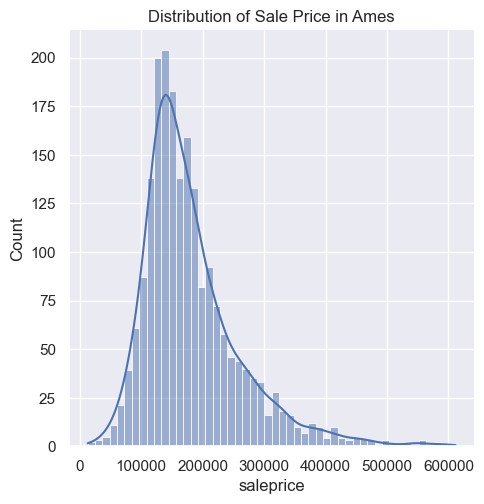

In [57]:
# Distribution plot for Target variable - Sale price

sns.displot(dftrainEDAclean['saleprice'], kde=True, bins = 50);

plt.title(f'Distribution of Sale Price in Ames');

**Finding**

The population of property sale price in Ames has a skewed distribution.

## Summary of EDA

There are 42 categorical variables & 37 numerical variables (excluding `id` & `pid`). A good mix on categorical and numerical variables should be used when training the ML regression model to predict an accurate sale price. It is unwise to feed all 79 variables into the model. This is because that would create unnecessary noise and cause the model to be overfitted.

Hence, we will consider the below variables as our predictor features in our model.

Variable|Justifications
---|---
The building class|Significant variance in sale price across the different categories
The general zoning classification of the sale|Significant variance in sale price across the different categories
Physical locations (neighborhood)|Significant variance in sale price across the different categories
Style of dwelling|Significant variance in sale price across the different categories
Overall material & finish quality|Linear relationship with sale price
Overall condition rating|Approximately linear relationship with sale price
Year of remodel date|Approximately linear relationship with sale price
Masonry veneer area|Significant variance between variable and sale price
Masonry veneer type|Significant variance in sale price across the different categories
Exterior material quality|Significant variance in sale price across the different categories
Type of foundation|Significant variance in sale price across the different categories
Height of the basement|Significant variance in sale price across the different categories
Quality of basement finished area|Significant variance in sale price across the different categories
Total basement area|Approximately linear relationship with sale price
Heating quality & condition|Approximately linear relationship with sale price
Above grade living area|Approximately linear relationship with sale price
Kitchen quality|Significant variance in sale price across the different categories
Total rooms above grade (does not include bathrooms)|Approximately linear relationship with sale price
Fireplace quality|Significant variance in sale price across the different categories
Size of garage|Approximately linear relationship with sale price



As for the rest of the variables, they are not considered as suitable predictor features due to the below reasons:
1. Some of them have the same data observation value for more than 85% of the train data observations (Lack of variance in observation value)
2. Some of them have datapoints that are too concentrated to each other with respect to the property sale price
3. `garage_yr_blt` have a outlier that would cause more noise to the model. That outlier has been proven to be erroneous. We can exclude this variable as it does not have a linear relationship with sale price.

**Please proceed to Book 2 for Preprocessing & Features Engineering**